## Model Training

### Necessary Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Load the preprocessed data

In [2]:
X_train = pd.read_csv('data/processed_X_train.csv')
X_test = pd.read_csv('data/processed_X_test.csv')
y_train = pd.read_csv('data/processed_y_train.csv').values.ravel()
y_test = pd.read_csv('data/processed_y_test.csv').values.ravel()

### Training Logistic Regression Model

In [3]:
print("Training Logistic Regression...")
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

Training Logistic Regression...


### Evaluating Logistic Regression

In [4]:
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))



Logistic Regression Accuracy: 0.9324324324324325

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.92      0.75      0.83        16

    accuracy                           0.93        74
   macro avg       0.93      0.87      0.89        74
weighted avg       0.93      0.93      0.93        74


Confusion Matrix:
 [[57  1]
 [ 4 12]]


### Training Random Forest Model

In [5]:
print("\nTraining Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Training Random Forest...


### Evaluation Random Forest Model

In [6]:
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        16

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74


Confusion Matrix:
 [[58  0]
 [ 0 16]]


### Training XGBoost Model

In [7]:
print("\nTraining XGBoost...")
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


Training XGBoost...


### Evaluating XGBoost Model

In [8]:
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



XGBoost Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        16

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74


Confusion Matrix:
 [[58  0]
 [ 0 16]]


#### Comparing Results

In [9]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb)
]

#### Plotting Accuracies

/tmp/ipykernel_37909/1178112126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="Blues_d")


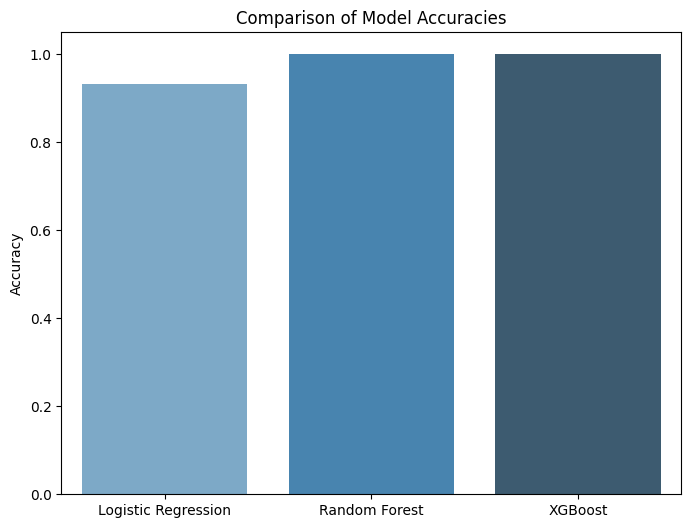

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette="Blues_d")
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()